<a href="https://colab.research.google.com/github/Josh1313/Bmw_Preprocessing/blob/modelos_regresion/Clase3Modelo_RegresionBmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns              # Visualizacion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Bmw_data_preproceamiento/Clases_limpieza/Clase 1 - Limpieza datos PREPRO_ML.pkl")

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

# porque este modelo es sencillo es para marcar las funcionalidades de cada paso ahora estamos listo para pasarle el data frame ya limpio codificado al modelo pero haremos unos cambios los siguientes para que vayan viendo del porque el modelo cuando es boleanna lo entiende perfectamente asi que no hay necesidad de codificar las boleanas pero si que borraremos las columnas de frecha de registro y de venta ya que hems extraido la informacion en la columna el tiempo en meses que se tardo vender el coche

In [ ]:
df.describe()

,km,potencia,precio,tiempo_venta,LOG_PRECIO,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
count,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717,...,4717,4717,4717,4717,4717,4717,4717,4717,4717,4717
mean,139448,129,16137,64,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
std,57527,39,9088,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
min,64,25,1500,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,101705,100,11100,49,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,140084,120,14300,58,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,174690,135,18800,71,4,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
max,484615,423,178500,274,5,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.shape

(4717, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4802
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   km                           4717 non-null   float64       
 1   potencia                     4717 non-null   float64       
 2   fecha_registro               4717 non-null   datetime64[ns]
 3   volante_regulable            4717 non-null   bool          
 4   aire_acondicionado           4717 non-null   bool          
 5   camara_trasera               4717 non-null   bool          
 6   asientos_traseros_plegables  4717 non-null   bool          
 7   elevalunas_electrico         4717 non-null   bool          
 8   bluetooth                    4717 non-null   bool          
 9   gps                          4717 non-null   bool          
 10  alerta_lim_velocidad         4717 non-null   bool          
 11  precio                       4717 non-null 

In [ ]:
df.head()

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_X_SERIES
0,140411,100,2012-02-01,True,True,False,False,True,True,True,...,0,1,0,0,0,0,0,0,0,0
1,13929,317,2016-04-01,True,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,1,0
2,183297,120,2012-04-01,False,False,False,False,True,False,True,...,0,0,0,1,0,0,0,0,0,0
3,128035,135,2014-07-01,True,True,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,97097,160,2014-12-01,True,True,False,False,False,True,True,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.drop(['fecha_registro', 'fecha_venta'], axis=1, inplace=True)


In [ ]:
del df['precio']

In [ ]:
from sklearn.model_selection import train_test_split


# Dividir los datos en características (X) y objetivo (y)
X = df.drop(columns=['LOG_PRECIO'])
y = df['LOG_PRECIO']

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño de conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Tamaño de conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Tamaño de conjunto de entrenamiento (X_train, y_train): (3773, 42) (3773,)
Tamaño de conjunto de prueba (X_test, y_test): (944, 42) (944,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train_scaled)
y_test_pred = regression_model.predict(X_test_scaled)


In [ ]:
# Métricas para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

In [ ]:
# Métricas para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Imprimir las métricas para el conjunto de entrenamiento
print('TRAIN')
print('MAE:', round(mae_train, 4))
print('MSE:', round(mse_train, 4))
print('RMSE:', round(rmse_train, 4))
print('R2-score:', round(r2_train, 4))

TRAIN
MAE: 0.059
MSE: 0.0076
RMSE: 0.087
R2-score: 0.841


In [ ]:

print()

# Imprimir las métricas para el conjunto de prueba
print('TEST')
print('MAE:', round(mae_test, 4))
print('MSE:', round(mse_test, 4))
print('RMSE:', round(rmse_test, 4))
print('R2-score:', round(r2_test, 4))


TEST
MAE: 0.0598
MSE: 0.0079
RMSE: 0.0887
R2-score: 0.8359


In [ ]:
    # Visualizacion
              # Visualizacion

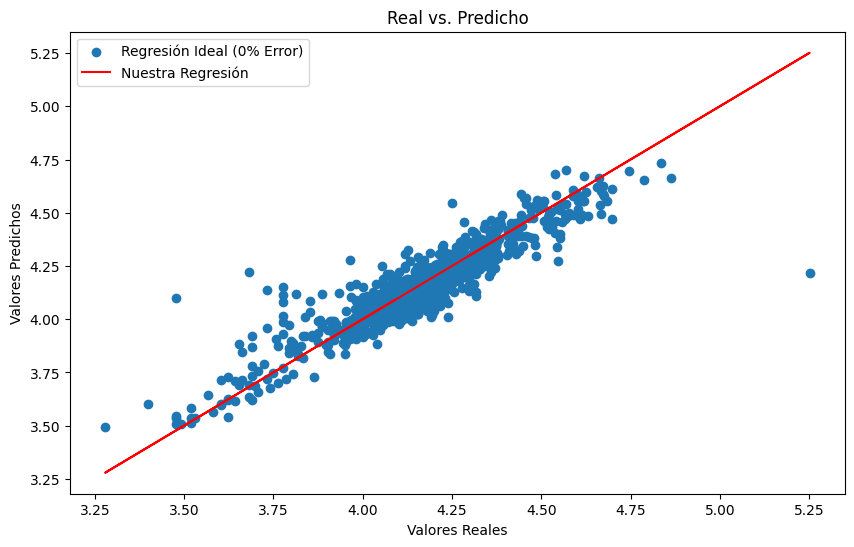

In [ ]:
plt.figure(figsize=[10,6])
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r')
plt.title('Real vs. Predicho')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend(['Regresión Ideal (0% Error)', 'Nuestra Regresión'])
plt.show()


In [ ]:
pip install lazypredict


In [ ]:

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# X = data.drop("precio_log10", axis=1)
# y = data["precio_log10"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Escalamos los datos
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Crear un estimador LazyRegressor
reg = LazyRegressor(predictions=True)

# Ajustamos el modelo y obtenemos las métricas
models = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)


# Imprimimos las métricas
print(models)


100%|██████████| 42/42 [00:52<00:00,  1.24s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 3773, number of used features: 38
[LightGBM] [Info] Start training from score 4.151509
(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.85       0.86  0.08        0.20
HistGradientBoostingRegressor                0.85       0.86  0.08        7.37
ExtraTreesRegressor                          0.85       0.85  0.08        4.63
GradientBoostingRegressor                    0.85       0.85  0.08        2.61
RandomForestRegressor                        0.84       0.85  0.08        2.70
NuSVR                                     